<a href="https://colab.research.google.com/github/ianblakley/data-curation-and-analysis/blob/main/data_curation_and_analysis_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
response = requests.get("https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW")
bs = BeautifulSoup(response.content, 'html.parser')
dataset = bs.find('table', {'class': 'a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated'})

data = []
rows = dataset.find_all('tr')
for row in rows:
  columns = row.find_all(['td', 'th'])
  row_text = [col.get_text(strip=True) for col in columns]
  data.append(row_text)

column_names = data[0]
movies_df = pd.DataFrame(data[1:], columns=column_names)

Here I used beautifulsoup and pandas to read through the webpage and construct a dataframe based off of the table on the website using find_all('tr')

In [6]:
movies_df.head()

,Rank,Title,Lifetime Gross,Year
0,1,Avatar,"$2,923,706,026",2009
1,2,Avengers: Endgame,"$2,799,439,100",2019
2,3,Avatar: The Way of Water,"$2,320,250,281",2022
3,4,Titanic,"$2,264,743,305",1997
4,5,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015


In [3]:
movies_df['Lifetime Gross'] = movies_df['Lifetime Gross'].str.strip('$').str.replace(',','').astype(float)

In [4]:
movies_df['Lifetime Gross']

0      2.923706e+09
1      2.799439e+09
2      2.320250e+09
3      2.264743e+09
4      2.071310e+09
           ...     
195    5.696263e+08
196    5.686528e+08
197    5.675354e+08
198    5.637493e+08
199    5.598524e+08
Name: Lifetime Gross, Length: 200, dtype: float64

In [10]:
movies_df.to_csv('movies_df.csv')

Here I converted the gross values from strings to floats so I can more easily calculate descriptive statistics and create visualizations using these values

In [5]:
gross_mean = movies_df['Lifetime Gross'].mean()

In [6]:
gross_mean

909261251.13

In [7]:
gross_median = movies_df['Lifetime Gross'].median()
gross_median

810207663.0

In [8]:
gross_std = movies_df['Lifetime Gross'].std()
gross_std

364858225.9107275

In [9]:
gross_var = movies_df['Lifetime Gross'].var()
gross_var

1.3312152501472346e+17

Here I'm computing some descriptive statistics including the mean, median, standard deviation, and variance of the lifetime gross column.

In [25]:
sorted_movies_df = movies_df.sort_values('Year')
sorted_movies_df.head()

,Rank,Title,Lifetime Gross,Year
111,112,Star Wars: Episode IV - A New Hope,7.753980e+08,1977
103,104,E.T. the Extra-Terrestrial,7.929106e+08,1982
33,34,Jurassic Park,1.113139e+09,1993
150,151,Forrest Gump,6.782265e+08,1994
56,57,The Lion King,9.685118e+08,1994


Text(0, 0.5, 'Lifetime Gross in USD (Billions)')

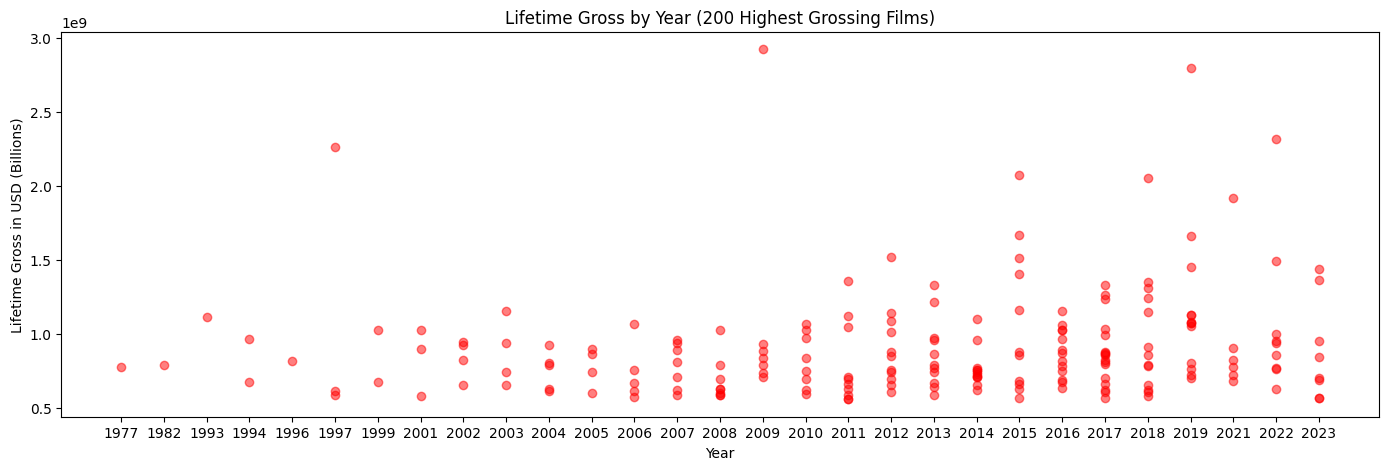

In [26]:
fig, ax = plt.subplots(figsize=(17,5))
ax.scatter(sorted_movies_df['Year'], sorted_movies_df['Lifetime Gross'], c= 'red', alpha= 0.5)
ax.set_title('Lifetime Gross by Year (200 Highest Grossing Films)')
ax.set_xlabel('Year')
ax.set_ylabel('Lifetime Gross in USD (Billions)')

Here I have created a visualization of the highest lifetime gross by year, in order from the earliest year in the dataframe to the most recent. To do this, I had to sort the dataframe by year so that the years would be in a neat order rather than ordering it by lifetime gross.